In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings("ignore")

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

In [6]:
data = pd.read_csv(r"C:\Users\nikhi\Downloads\archive (1)\data.csv")
data.columns = [i.title().strip() for i in list(data.columns)]

row = data.shape[0]
col = data.shape[1]
print("The number of rows within the dataset are {} and the number of columns is {}".format(row,col))

The number of rows within the dataset are 6819 and the number of columns is 96


In [7]:
data.isnull().sum().sort_values(ascending=False).head()

Bankrupt?                                                  0
Roa(C) Before Interest And Depreciation Before Interest    0
Total Expense/Assets                                       0
Total Income/Total Expense                                 0
Retained Earnings To Total Assets                          0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   Roa(C) Before Interest And Depreciation Before Interest  6819 non-null   float64
 2   Roa(A) Before Interest And % After Tax                   6819 non-null   float64
 3   Roa(B) Before Interest And Depreciation After Tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-Tax Net Interest Rate                                6819 non-null   float64
 8   After-Tax Net Interest Rate 

Since there are no missing values, we can jump into analyzing the data

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

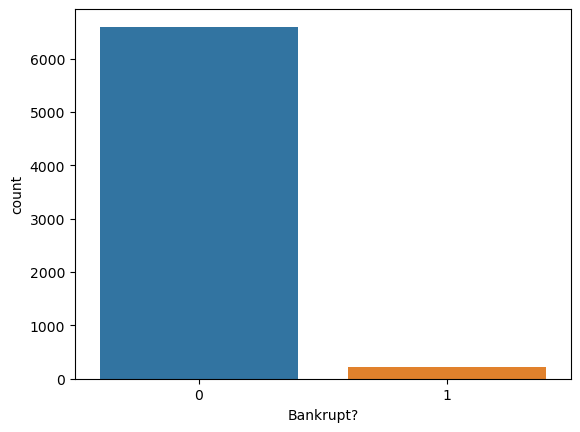

In [8]:
sns.countplot(x='Bankrupt?', data=data)

The records are observed to be highly imbalanced. Thus it is necessary to consider balancing the dataset through "Upsampling or Downsampling" techniques.

In [9]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index

data[categorical_features].columns.tolist()

['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']

There are only three categorical data columns, we will first explore these columns

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64


<AxesSubplot:xlabel='Liability-Assets Flag', ylabel='count'>

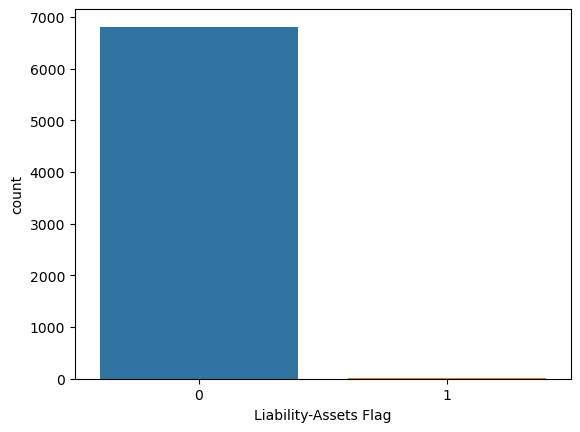

In [10]:
print(data['Liability-Assets Flag'].value_counts())
sns.countplot('Liability-Assets Flag',data=data)

The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0. A majority number of times, organizations/company's assets are more than their liabilities.

Liability-Assets Flag  Bankrupt?
0                      0            6597
                       1             214
1                      1               6
                       0               2
dtype: int64


<AxesSubplot:xlabel='Liability-Assets Flag', ylabel='count'>

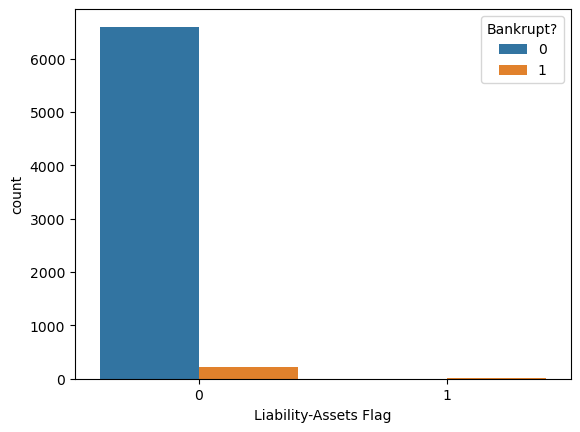

In [11]:
print(data[['Liability-Assets Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Liability-Assets Flag',hue = 'Bankrupt?',data = data)

A small portion of organizations suffers bankruptcy, although possessing more assets than their liabilities.

In [12]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

1    6819
Name: Net Income Flag, dtype: int64


<AxesSubplot:xlabel='Net Income Flag', ylabel='count'>

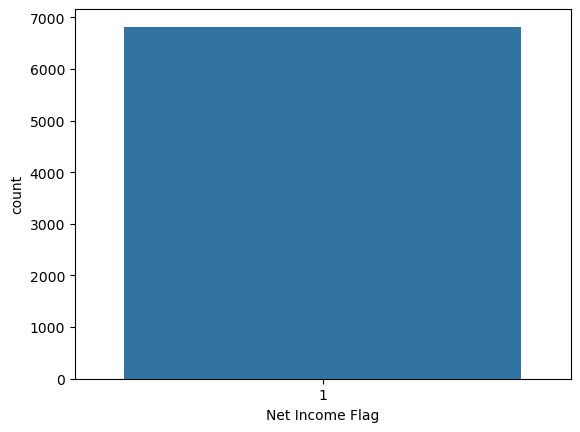

In [13]:
print(data['Net Income Flag'].value_counts())
sns.countplot('Net Income Flag',data=data)

The "Net Income" flag denotes the status of an organization's income in the last two years, where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. We observe that all the records have been exhibiting a loss for the past two years.

Net Income Flag  Bankrupt?
1                0            6599
                 1             220
dtype: int64


<AxesSubplot:xlabel='Net Income Flag', ylabel='count'>

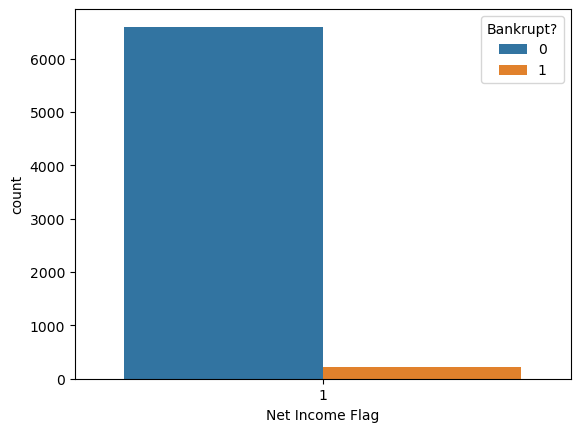

In [14]:


print(data[['Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt?',data = data)

Many organizations that have suffered losses for the past two years have stabilized their business, thus avoiding bankruptcy

In [15]:
positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = data[positive_corr + ["Bankrupt?"]].copy()
negative_corr = data[negative_corr + ["Bankrupt?"]].copy()

For the sake of simplicity, we analyze the six top positively and negatively correlated attributes.

In [16]:
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [17]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))
    value = randint(0, len(colors)-1)

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = data)

    plt.tight_layout(pad=0.5)

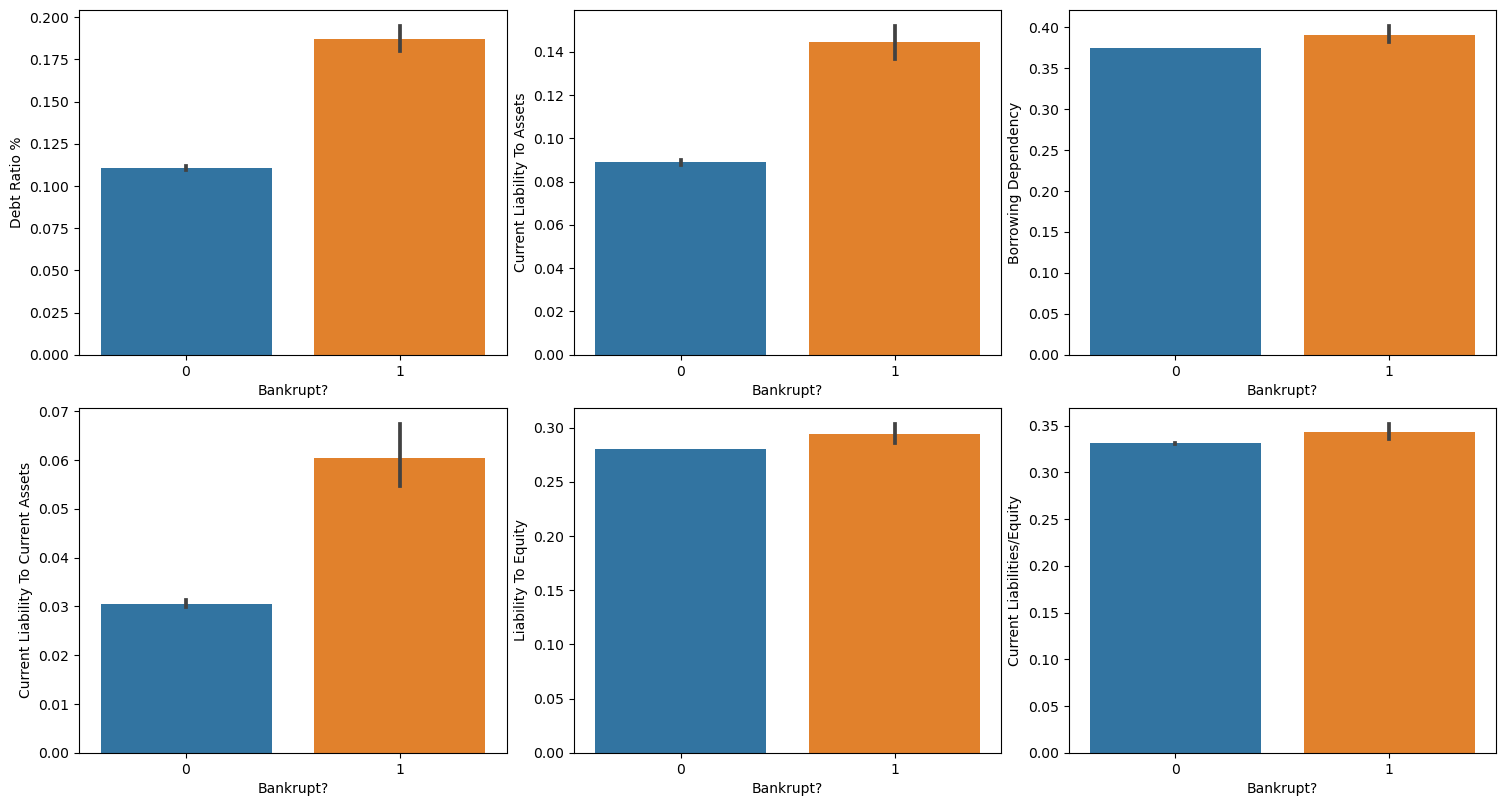

In [18]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

We see that three attributes - "Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" are commonly high in bankrupt organizations.

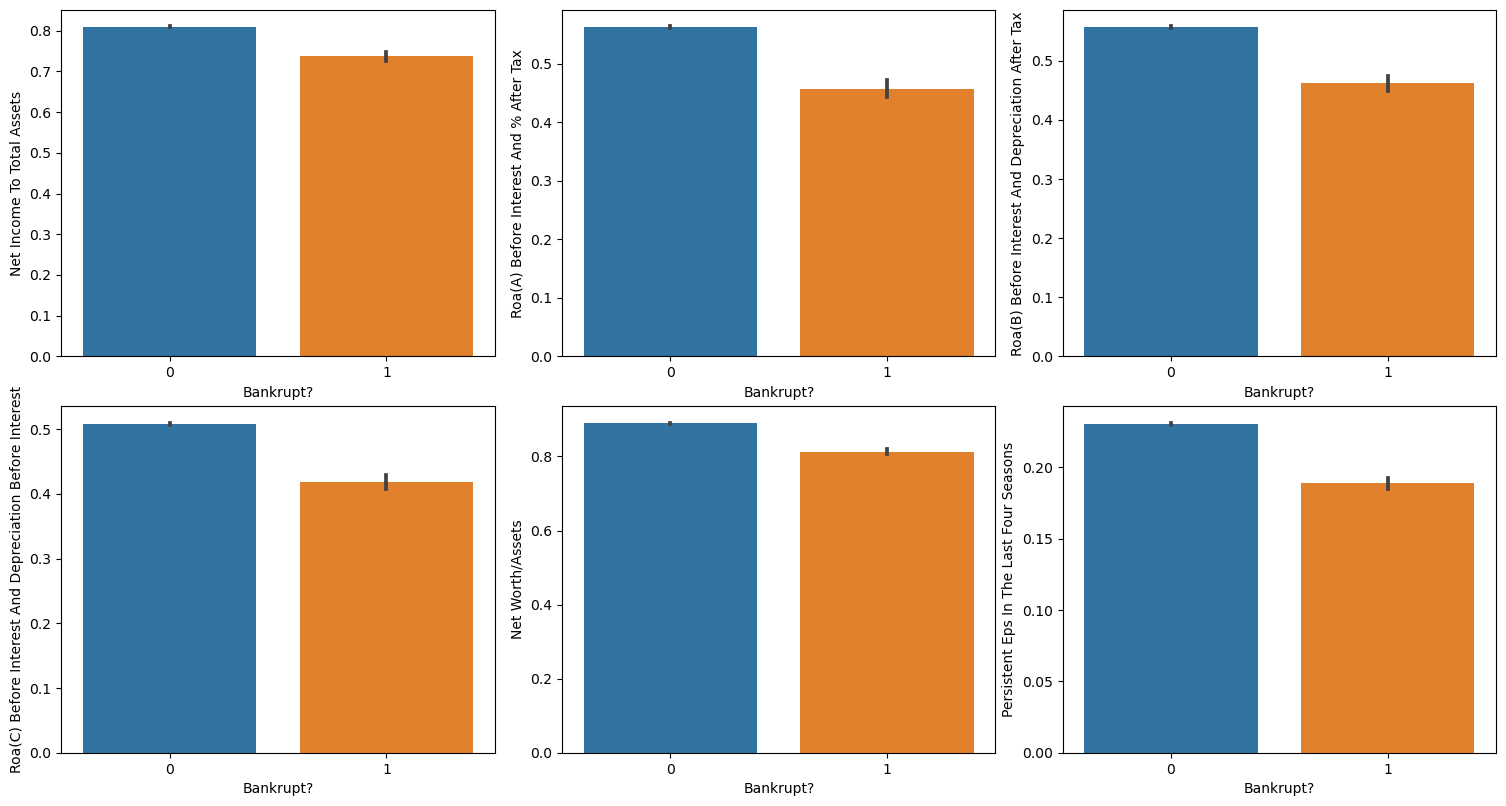

In [19]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

These attributes show us that the more the assets and earing of a company, the less likely is the organization to be bankrupt.
Let us check the relation of top six positive and negative correlation attributes among eachother

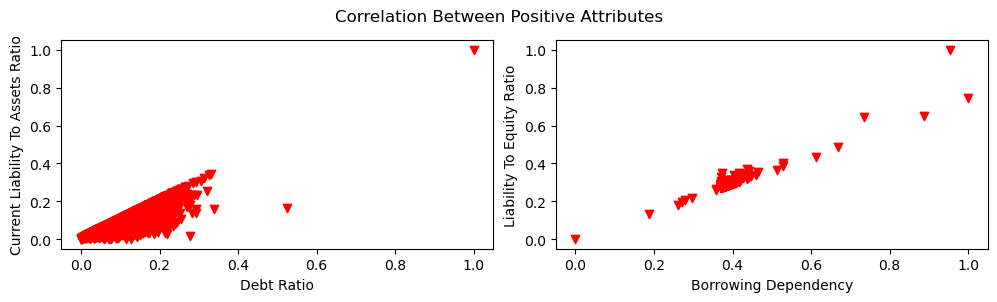

In [20]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
plt.scatter(data["Debt Ratio %"],data["Current Liability To Assets"], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
plt.scatter(data["Borrowing Dependency"],data["Liability To Equity"], marker='v',color = 'red')

plt.tight_layout(pad=0.8)

There is a positive relation between attributes that have a high correlation with the target attribute.

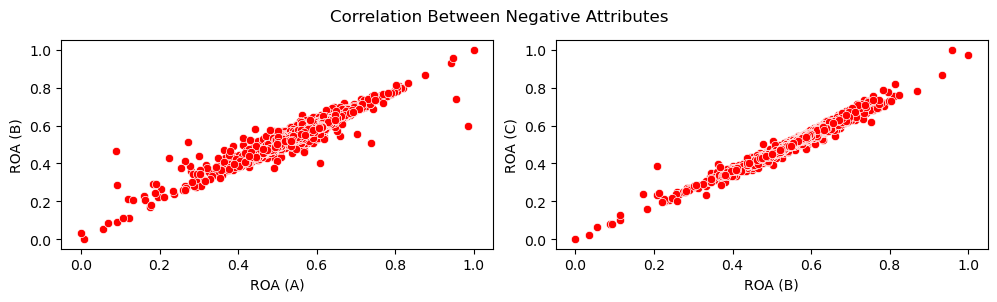

In [21]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(data=data, x='Roa(A) Before Interest And % After Tax', y='Roa(B) Before Interest And Depreciation After Tax',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(data=data, x='Roa(B) Before Interest And Depreciation After Tax', y='Roa(C) Before Interest And Depreciation Before Interest',color = 'red')

plt.tight_layout(pad=0.8)

There is a positive relation between attributes that have a low correlation with the target attribute.

<AxesSubplot:>

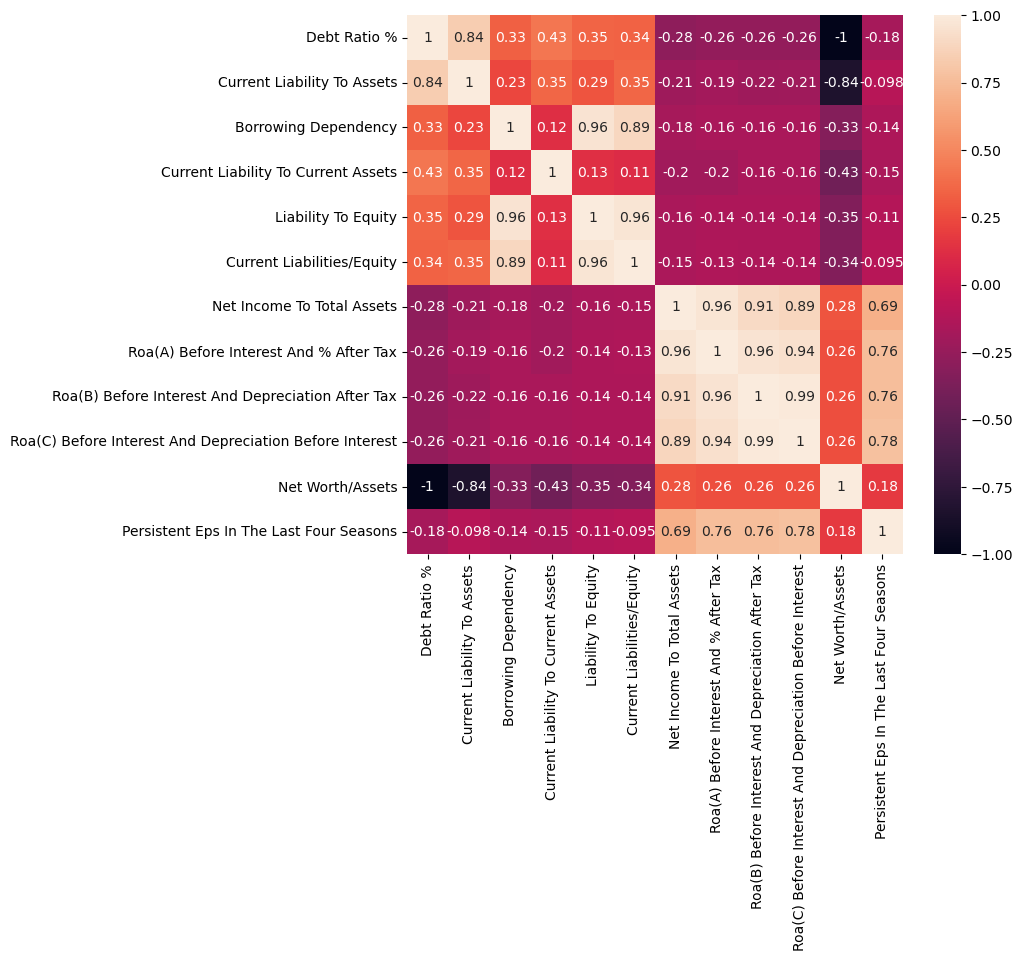

In [22]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))

sns.heatmap(data[relation].corr(),annot=True)

A total correlation of the top 12 attributes are given above

Summary of Analysis


The number of organizations that have gone bankrupt in 10 years between 1999 – 2000 is few.
Several companies possess many assets, which is always a good sign for an organization.
An organization cannot guarantee not being bankrupt, although owning several assets.
The organizations in the dataset are running into losses for the past two years as their net income poses to be negative.
Very few of the organizations that have had negative income in the past two years suffer from bankruptcy.
It is observed that “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" attributes are a few of the attributes that have a high correlation with the target attribute.
An increase in the values of the attributes “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” causes an organization to suffer heavy losses, thus resulting in bankruptcy.
An increase in the values of the attributes that have a negative correlation with the target attribute helps an organization avoid bankruptcy.
There seems to be a relation between attributes that have a high correlation with the target attribute and a low correlation with the target attribute.
We observed several correlations among the top 12 attributes, one of which being “Net Worth/Assets and Debt Ratio %” that is negatively correlated with one another.

In [23]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
data[numeric_features] = data[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

data[numeric_features] = data[numeric_features].fillna(0)

In [24]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    data = Dataframe.copy()
    
    X = data.drop('Bankrupt?', axis=1)
    y = data['Bankrupt?']
    
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [25]:
print("Logistic Regression")
TrainedModel = taining_without_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'), data, "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)

Logistic Regression

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.23      0.82      0.36        51

    accuracy                           0.89      1364
   macro avg       0.61      0.86      0.65      1364
weighted avg       0.96      0.89      0.92      1364



In [26]:
print("DecisionTree Classifier")
TrainedModel = taining_without_feature_selection({"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}, DecisionTreeClassifier(), data, "DecisionTree Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

DecisionTree Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1313
           1       0.18      0.90      0.31        51

    accuracy                           0.85      1364
   macro avg       0.59      0.87      0.61      1364
weighted avg       0.97      0.85      0.89      1364



In [27]:
print("Random Forest Classifier")
TrainedModel = taining_without_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), data, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Random Forest Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1313
           1       0.83      0.94      0.88        51

    accuracy                           0.99      1364
   macro avg       0.91      0.97      0.94      1364
weighted avg       0.99      0.99      0.99      1364



In [28]:
print("K Nearest Neighbour")
TrainedModel = taining_without_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), data,"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

K Nearest Neighbour


NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
Models.sort_values('F1 score',ascending=False)

We see that among all the models "Random Forest Classifier " have the highest F-1 Score. Thus, we may use these models to train our data.

In [ ]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_with_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    data = Dataframe.copy()
    
    X = data.drop('Bankrupt?', axis=1)
    y = data['Bankrupt?']
    
    
    fs = SelectKBest(score_func=f_classif, k=int((data.shape[1]*85)/100))

    X = fs.fit_transform(X, y)
    
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)

    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [ ]:
print("Random Forest Classifier")
trained_model = training_with_feature_selection({"max_depth": [3, 5, 10, None], "n_estimators": [100, 200, 300, 400, 500]}, RandomForestClassifier(), data, "Random Forest Classifier")
Models = Models.append(trained_model, ignore_index=True)


In [ ]:
print("K Nearest Neighbour")
TrainedModel = taining_with_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), data,"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

In [29]:
Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
2,Random Forest Classifier,99.05%,0.83,0.94,0.88,0.97
0,Logistic Regression,89.15%,0.23,0.82,0.36,0.86
1,DecisionTree Classifier,84.68%,0.18,0.90,0.31,0.87
